In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import basinhopping
from iminuit import Minuit

import emcee
from pprint import pprint
import time
from multiprocessing import Pool

import random

In [2]:
# 参考 08 Arevalo 取log bin的函数

def databin_are(lst,f):
    result = [[]]
    f_length = len(f)
    f_i = f[0]
    for i in range(f_length):
        if f[i]<=1.3*f_i:
            result[-1].append(math.log(lst[i],10))
        else:
            if len(result[-1])<=2:
                result[-1].append(math.log(lst[i],10))
            else:
                result.append([])
                result[-1].append(math.log(lst[i],10))
                f_i = f[i]
    result.pop()
    output=[]
    for j in range(len(result)):
        output.append(np.mean(result[j]))
    return output        
            

def databin_are_std(lst,f):
    result = [[]]
    f_length = len(f)
    f_i = f[0]
    for i in range(f_length):
        if f[i]<=1.3*f_i:
            result[-1].append(math.log(lst[i],10))
        else:
            if len(result[-1])<=2:
                result[-1].append(math.log(lst[i],10))
            else:
                result.append([])
                result[-1].append(math.log(lst[i],10))
                f_i = f[i]
    result.pop()
    output=[]
    for j in range(len(result)):
        output.append(np.std(result[j]))
    return output

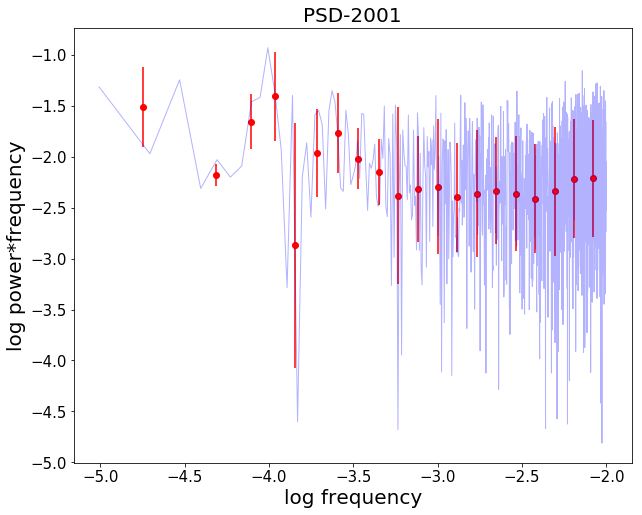

In [3]:
data01 = pd.read_csv("rate_ngc4051_01_210_tb50.csv")
data01['RATE'] = data01['RATE'].interpolate()


dt=50
counts_data = data01['RATE']
N = len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]


nf = N/2    # Nyquist
df = 1/(dt*N)
F_a = np.arange(nf+1)
F = [i*df for i in F_a]
F1 = F[1:int(nf)]    # 除去f=0及f=f_Nyquist
mean_x = np.mean(counts_data)
dft = fft(counts_data-mean_x)
dft1 = dft[1:int(nf)]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))

F1_log_01 = [math.log(i,10) for i in F1]
ptf_data_log_01 = [math.log(i,10) for i in p_times_f_data]

# 数据分bin
F1_binned_01 = databin_are(F1,F1)
per_data_binned_01 = databin_are(per_data,F1)
per_data_b_std_01 = databin_are_std(per_data,F1)
p_times_f_data_b_01 = np.array(F1_binned_01)+np.array(per_data_binned_01)


plt.figure(figsize=(10,8))
plt.plot(F1_log_01, ptf_data_log_01, color="b", alpha=0.3, linewidth=1)
plt.scatter(F1_binned_01, p_times_f_data_b_01, color="r", linewidth=1) 
plt.errorbar(F1_binned_01, p_times_f_data_b_01, yerr=per_data_b_std_01, fmt='.r')
plt.xlabel("log frequency",fontsize=20)
plt.ylabel("log power*frequency",fontsize=20)
plt.title("PSD-2001",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

perlist_01 = {'f':F1,'per':per_data}
test = pd.DataFrame(perlist_01,columns = ['f','per'])
test.to_csv('perlist01_h.csv')

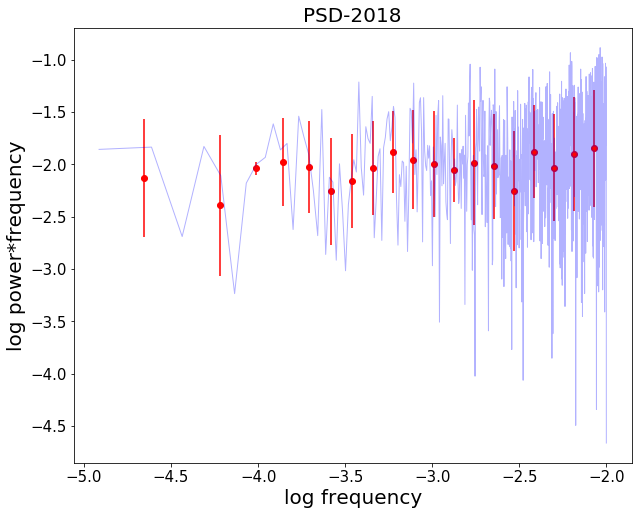

In [4]:
data182 = pd.read_csv("rate_ngc4051_182_210_tb50.csv")
data182['RATE'] = data182['RATE'].interpolate()


dt=50
counts_data = data182['RATE']
N = len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]


nf = N/2    # Nyquist
df = 1/(dt*N)
F_a = np.arange(nf+1)
F = [i*df for i in F_a]
F1 = F[1:int(nf)]    # 除去f=0及f=f_Nyquist
mean_x = np.mean(counts_data)
dft = fft(counts_data-mean_x)
dft1 = dft[1:int(nf)]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))

F1_log_182 = [math.log(i,10) for i in F1]
ptf_data_log_182 = [math.log(i,10) for i in p_times_f_data]

# 数据分bin
F1_binned_182 = databin_are(F1,F1)
per_data_binned_182 = databin_are(per_data,F1)
per_data_b_std_182 = databin_are_std(per_data,F1)
p_times_f_data_b_182 = np.array(F1_binned_182)+np.array(per_data_binned_182)


plt.figure(figsize=(10,8))
plt.plot(F1_log_182, ptf_data_log_182, color="b", alpha=0.3, linewidth=1)
plt.scatter(F1_binned_182, p_times_f_data_b_182, color="r", linewidth=1) 
plt.errorbar(F1_binned_182, p_times_f_data_b_182, yerr=per_data_b_std_182, fmt='.r')
plt.xlabel("log frequency",fontsize=20)
plt.ylabel("log power*frequency",fontsize=20)
plt.title("PSD-2018",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

perlist_182 = {'f':F1,'per':per_data}
test = pd.DataFrame(perlist_182,columns = ['f','per'])
test.to_csv('perlist182_h.csv')